# 전처리한 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# train.csv : 훈련용
# test.csv : 테스트용 -> 예측해서 제출
# sample_sub...csv : 제출용
import os

# 인덱스로 인한 ValueError -> index col = 'id' 코드 삭제
path = '/Users/sehyunjeon/Desktop/playground-series-s4e1/data_processed2'
train = pd.read_csv( os.path.join(path,'bank_train.csv') )
test  = pd.read_csv( os.path.join(path,'bank_test.csv') )
submission = pd.read_csv( os.path.join(path,'sample_submission (1).csv') )

display( train.head(1)) # 0 ~ 165033
display( test.head(1)) # 165034 ~
display( submission.head(1) ) # 0 혹은 1일 확률(predict_proba())을 제시-> 기입 -> 제출

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,surname_tfidf_0,surname_tfidf_1,surname_tfidf_2,surname_tfidf_3,surname_tfidf_4,surname_tfidf_5,surname_tfidf_6,surname_tfidf_7,surname_tfidf_8,surname_tfidf_9
0,0.211599,0.636,0,1,0.202703,3,0.0,2,1.0,0.0,...,-1.544090e-07,-2.746845e-07,-4.762159e-07,5.157937e-07,-7.900809e-07,-0.000003,0.000005,0.000015,-0.000025,-0.000008


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,surname_tfidf_0,surname_tfidf_1,surname_tfidf_2,surname_tfidf_3,surname_tfidf_4,surname_tfidf_5,surname_tfidf_6,surname_tfidf_7,surname_tfidf_8,surname_tfidf_9
0,0.188126,0.472,0,0,0.067568,2,0.0,2,0.0,1.0,...,0.000013,-0.000125,0.000002,-0.000171,-0.000197,0.000047,0.000463,-0.00107,0.002308,-0.002354


,id,Exited
0,165034,0.5


# 피처엔지니어링

## 이전 모델링 특성중요도에서 중요도가 낮았던 피처 삭제

In [5]:
delete_features = ['surname_tfidf_0', 'surname_tfidf_1', 'surname_tfidf_2', 'surname_tfidf_3', 'surname_tfidf_4', 'surname_tfidf_5', 'surname_tfidf_6',
                   'surname_tfidf_7', 'surname_tfidf_8', 'surname_tfidf_9', 'IsSenior', 'Products_Per_Tenure', 'AgeCategory'] # 주로 새로 생성된 피처

train.drop(delete_features, axis=1, inplace=True)
test.drop(delete_features, axis=1, inplace=True)

train.shape, test.shape
train.head()
test.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsActive_by_CreditCard,Sur_Geo_Gend_Sal
0,0.188126,0.472,0,0,0.067568,2,0.000000,2,0.0,1.0,0.804903,0,0.234288
1,0.263225,0.666,0,0,0.378378,2,0.000000,1,1.0,0.0,0.362723,0,0.211599
2,0.175690,0.612,0,0,0.216216,7,0.000000,2,1.0,0.0,0.694419,0,0.229677
3,0.187270,0.662,0,1,0.243243,8,0.000000,1,1.0,0.0,0.569654,0,0.084656
4,0.267633,0.804,1,1,0.270270,10,0.483318,1,1.0,0.0,0.697164,0,0.211599


## 피처 요약표 제작

In [5]:
# 결측치 수 계산
# True, False => sum() => 1, 0 치환되서 처리

train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# 고유값 수 계산
train.nunique()

Surname                   52310
CreditScore                 457
Geography                     3
Gender                        2
Age                          71
Tenure                       11
Balance                   30075
NumOfProducts                 4
HasCrCard                     2
IsActiveMember                2
EstimatedSalary           55298
Exited                        2
IsActive_by_CreditCard        2
Sur_Geo_Gend_Sal           9400
dtype: int64

In [7]:
def summary_feature_info( df ):
    '''
        주어진 df로 부터 피처별 요약된 정보 생성 제공
    '''
    # 타입을 데이터로 기본 구성
    summary_df = pd.DataFrame( df.dtypes, columns=['타입'])
    summary_df.reset_index(inplace=True) # 인덱스 -> 컬럼으로 이동
    summary_df.rename( columns={'index':'feature'}, inplace=True) # 컬럼명 변경
    #결측치수
    summary_df['결측치수'] = df.isnull().sum().values
    # 고유값수
    summary_df['고유값수'] = df.nunique().values
    # 샘플함수를 이용 추출후 하나씩 적용해도 관계 없음
    # 샘플값_0
    summary_df['샘플값_0'] = df.iloc[0].values
    # 샘플값_1
    summary_df['샘플값_1'] = df.iloc[1].values
    # 샘플값_2
    summary_df['샘플값_2'] = df.iloc[2].values
    return summary_df


# 피처요약표 생성
summary_feature_info( train )

,feature,타입,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,Surname,float64,0,52310,0.211599,0.211599,0.211599
1,CreditScore,float64,0,457,0.636000,0.554000,0.656000
2,Geography,int64,0,3,0.000000,0.000000,0.000000
3,Gender,int64,0,2,1.000000,1.000000,1.000000
4,Age,float64,0,71,0.202703,0.202703,0.297297
5,Tenure,int64,0,11,3.000000,1.000000,10.000000
6,Balance,float64,0,30075,0.000000,0.000000,0.000000
7,NumOfProducts,int64,0,4,2.000000,2.000000,2.000000
8,HasCrCard,float64,0,2,1.000000,1.000000,1.000000
9,IsActiveMember,float64,0,2,0.000000,1.000000,0.000000


## 피처엔지니어링 계획수립

- 모두 수치형이므로 스케일링만 하는 것으로 -> 추후 성능개선시
- Target = train 데이터의 Exited



## 일단 모델 구축

In [6]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

features = train.columns.values.tolist()
features.remove('Exited')
print(features)

# Splitting the training data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(train[features], train['Exited'], test_size=0.1, random_state=0) # 90% training and 10% test

['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'IsActive_by_CreditCard', 'Sur_Geo_Gend_Sal']


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 알고리즘 생성
model = RandomForestClassifier()
# 학습
model.fit(X_train, y_train)
# 예측 및 평가 -> 정확도
accuracy_score( y_test, model.predict(X_test) )

0.8630029083858458

# 모델링

## 알고리즘 선정

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, auc

In [11]:
als = {
    # '키:알고리즘명':(알고리즘객체, 선의 모양)
    'LGBMClassifier':( LGBMClassifier(), '--'),
    'CatBoostClassifier':( CatBoostClassifier(), '.-'),
    'GradientBoostingClassifier':( GradientBoostingClassifier(), ':')
}

[LightGBM] [Info] Number of positive: 31474, number of negative: 117056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 148530, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211903 -> initscore=-1.313491
[LightGBM] [Info] Start training from score -1.313491
LGBMClassifier 0.8900214451024905
Learning rate set to 0.087156
0:	learn: 0.6166388	total: 384ms	remaining: 6m 23s
1:	learn: 0.5567639	total: 643ms	remaining: 5m 20s
2:	learn: 0.5106785	total: 998ms	remaining: 5m 31s
3:	learn: 0.4724878	total: 1.54s	remaining: 6m 24s
4:	learn: 0.4431501	total: 1.8s	remaining: 5m 58s
5:	learn: 0.4207954	total: 2.07s	remaining: 5m 42s
6:	learn: 0.4039396	total: 2.33s	remaining: 5m 30s
7:	learn: 0.3906757	total: 2.46s	remaining: 5m 4s
8:	learn: 0.3793268	total: 2.76s	r

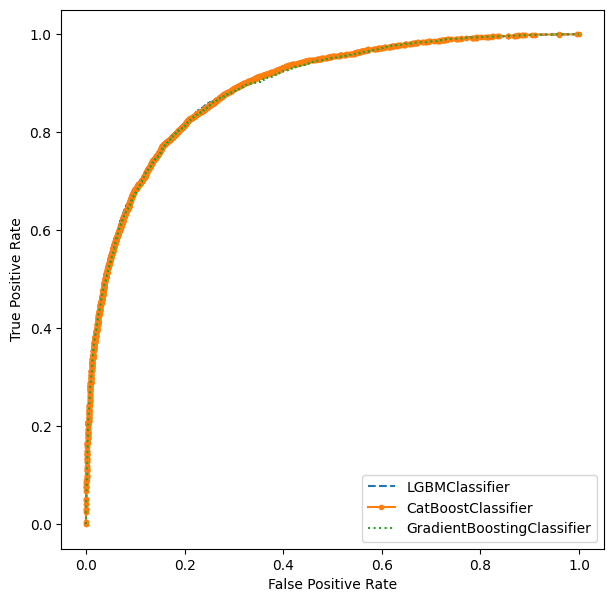

In [12]:
# 차트 모양
plt.figure( figsize=(7,7))

# 반복
for al_nm, ( model, line_style ) in als.items(): # 알고리즘 이름, 알고리즘객체, 선의 모양
    #print( al_nm, line_style, model)
    # 학습
    model.fit( X_train, y_train ) # 학습수행-> 데이터를 경험했다
    # 예측 : [ F 예측확률, T 예측확률 ]
    pred = model.predict_proba( X_test ) # 학습에 사용하지 않은 데이터->한번도 접하지 않은..
    #print( pred )
    # T를 예측한 확률만(1로 판정한 확률만) 추출
    pred_t = pred[ :, -1]
    # 성능평가
    # roc_curve(실제정답, T를예측한확률점수)
    fpr, tpr, _ = roc_curve(y_test.values, pred_t, )
    # 차트그리기 - 플로팅
    plt.plot( fpr, tpr, line_style, label=al_nm)
    # 곡선하면적 계산 제공
    print( al_nm, auc(fpr, tpr))
    #break
    pass

# 데코
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 화면출력
plt.show()

## ROC curve 시각화 함수

In [13]:
from sklearn import metrics

# 각 모델의 accuracy, log_loss, auc를 print하는 함수
def print_results(classifier_name, y_test, y_pred, y_pred_proba, fpr, tpr):
    print('Train/Test split results:')
    print(classifier_name + " accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
    print(classifier_name + " log_loss is %2.3f" % metrics.log_loss(y_test, y_pred_proba))
    print(classifier_name + " auc is %2.3f" % metrics.auc(fpr, tpr))

# ROC curve 시각화 함수
def plot_roc_curve(fpr, tpr, classifier_name):
    idx = np.min(np.where(tpr > 0.95))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.7f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(classifier_name + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

results = []
# 각 모델의 accuracy, log_loss 및 auc를 저장하는 함수
def save_accuracy(classifier_name, accuracy, log_loss, auc):
    results.append([classifier_name, accuracy, log_loss, auc])

# 차트
def plot_results():
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'AUC'])
    df_results = df_results.sort_values(by=['Accuracy'], ascending=False)
    df_results = df_results.reset_index(drop=True)
    scaler = MinMaxScaler()
    df_results['Log Loss'] = scaler.fit_transform(df_results['Log Loss'].values.reshape(-1, 1))
    df_results.rename(columns={'Log Loss': 'Log Loss (Normalized)'}, inplace=True)
    df_results.head()
    df_results_sorted = df_results.sort_values(by='AUC')

    bar_width = 0.25
    pos = np.arange(len(df_results_sorted['Model']))
    plt.figure(figsize=(12, 6))
    plt.bar(pos, df_results_sorted['Accuracy'], color='steelblue', width=bar_width, label='Accuracy')
    plt.bar(pos + bar_width, df_results_sorted['Log Loss (Normalized)'], color='limegreen', width=bar_width, label='Log Loss (Normalized)')

    # AUC 그래프 표시
    plt.bar(pos + 2*bar_width, df_results_sorted['AUC'], color='orange', width=bar_width, label='AUC')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance')
    plt.xticks(pos + bar_width, df_results_sorted['Model'], rotation=90)
    plt.ylim(0, 1)
    plt.legend()

    for i, auc in enumerate(df_results_sorted['AUC']):
        plt.annotate(f'{auc:.7f}',
                    xy=(pos[i] + 2*bar_width, auc),
                    xytext=(5, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    rotation=90)

    plt.tight_layout()
    plt.show()

### LightGBM

[LightGBM] [Info] Number of positive: 31474, number of negative: 117056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.303482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 148530, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211903 -> initscore=-1.313491
[LightGBM] [Info] Start training from score -1.313491
Train/Test split results:
LightGBM accuracy is 0.866
LightGBM log_loss is 0.318
LightGBM auc is 0.890


/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


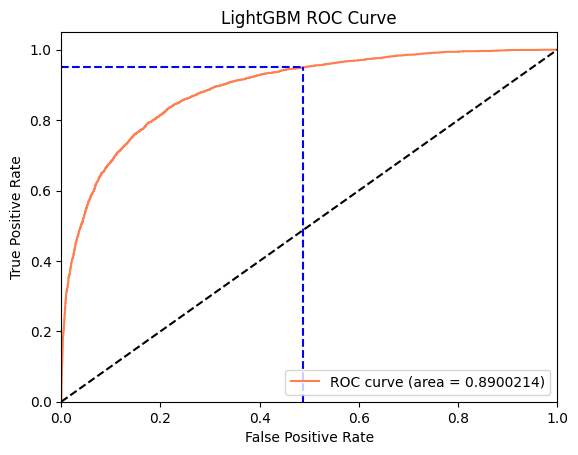

In [14]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
y_pred_proba = lgb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("LightGBM", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "LightGBM")
save_accuracy("LightGBM", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### CatBoost

0:	total: 334ms	remaining: 19m 27s
1:	total: 919ms	remaining: 26m 47s
2:	total: 1.4s	remaining: 27m 14s
3:	total: 1.9s	remaining: 27m 39s
4:	total: 2.27s	remaining: 26m 30s
5:	total: 2.53s	remaining: 24m 35s
6:	total: 2.87s	remaining: 23m 51s
7:	total: 3.13s	remaining: 22m 47s
8:	total: 3.46s	remaining: 22m 22s
9:	total: 3.75s	remaining: 21m 48s
10:	total: 4.01s	remaining: 21m 10s
11:	total: 4.28s	remaining: 20m 44s
12:	total: 4.59s	remaining: 20m 30s
13:	total: 4.85s	remaining: 20m 8s
14:	total: 5.13s	remaining: 19m 52s
15:	total: 5.41s	remaining: 19m 37s
16:	total: 5.55s	remaining: 18m 57s
17:	total: 5.78s	remaining: 18m 38s
18:	total: 6.01s	remaining: 18m 21s
19:	total: 6.44s	remaining: 18m 40s
20:	total: 6.72s	remaining: 18m 33s
21:	total: 6.9s	remaining: 18m 10s
22:	total: 7.41s	remaining: 18m 39s
23:	total: 7.79s	remaining: 18m 47s
24:	total: 8.05s	remaining: 18m 38s
25:	total: 8.35s	remaining: 18m 36s
26:	total: 9.34s	remaining: 20m 1s
27:	total: 9.71s	remaining: 20m 3s
28:	tota

/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


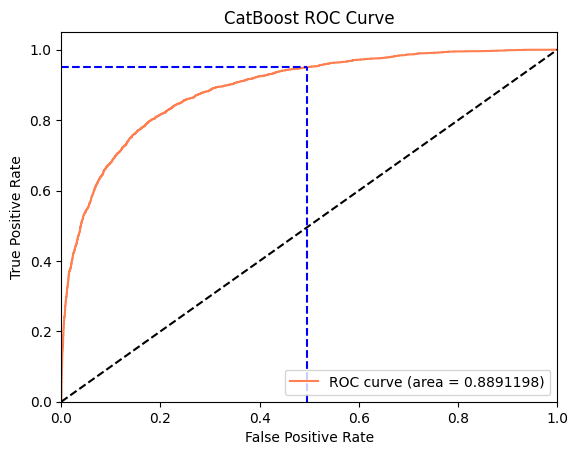

In [15]:
cat = CatBoostClassifier(eval_metric = 'AUC',learning_rate = 0.0025, iterations= 3500)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("CatBoost", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "CatBoost")
save_accuracy("CatBoost", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

### GradientBoosting

Train/Test split results:
GradientBoosting accuracy is 0.848
GradientBoosting log_loss is 0.385
GradientBoosting auc is 0.864


/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
/var/folders/3d/bw13qgj53dl9xj8v2_d34mbr0000gn/T/ipykernel_25393/4246835873.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


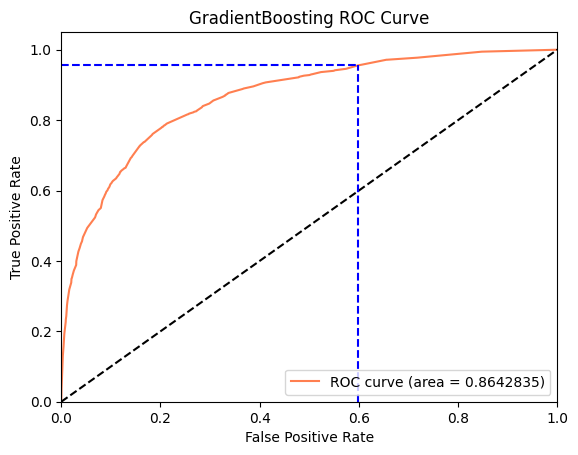

In [16]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

print_results("GradientBoosting", y_test, y_pred, y_pred_proba, fpr, tpr)
plot_roc_curve(fpr, tpr, "GradientBoosting")
save_accuracy("GradientBoosting", metrics.accuracy_score(y_test, y_pred), metrics.log_loss(y_test, y_pred_proba), metrics.auc(fpr, tpr))

# AutoML

In [17]:
from pycaret.classification import *

X = pd.concat( [X_train, y_train], axis=1)

clf = setup(data      = X,  # 훈련데이터 => DataFrame으로 공급
            target    = 'Exited', # 정답컬럼명
            verbose   = True,     # 로그출력
            train_size= 0.9,      # 훈련:검증 비율이 9:1 => cv 수행
            data_split_shuffle=True, # 데이터를 세트로 나눌때 섞을지 여부
            session_id= 100,      # 난수시드
            normalize = True      # 정규화 처리 진행 -> 피처엔지니어링-피처인코딩 처리를 부여
            )

top_5_model = compare_models(fold=5, round=3, sort="Accuracy", n_select=5)

models()

,Description,Value
0,Session id,100
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(148530, 14)"
4,Transformed data shape,"(148530, 14)"
5,Transformed train set shape,"(133677, 14)"
6,Transformed test set shape,"(14853, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.868,0.603,0.569,0.746,0.645,0.566,0.574,47.572
catboost,CatBoost Classifier,0.867,0.616,0.559,0.752,0.641,0.562,0.572,105.916
gbc,Gradient Boosting Classifier,0.866,0.891,0.542,0.757,0.632,0.553,0.564,125.172
xgboost,Extreme Gradient Boosting,0.866,0.581,0.568,0.741,0.643,0.563,0.570,85.262
rf,Random Forest Classifier,0.863,0.673,0.536,0.745,0.623,0.542,0.553,78.378
ada,Ada Boost Classifier,0.862,0.883,0.529,0.744,0.618,0.536,0.548,35.788
et,Extra Trees Classifier,0.861,0.762,0.522,0.746,0.614,0.532,0.545,28.132
knn,K Neighbors Classifier,0.847,0.684,0.528,0.678,0.594,0.501,0.507,119.716
lr,Logistic Regression,0.830,0.816,0.368,0.683,0.479,0.388,0.414,11.726
lda,Linear Discriminant Analysis,0.829,0.817,0.391,0.664,0.492,0.397,0.418,1.410


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# 성능 개선

## 피처엔지니어링 2

## 최적화

### 하이퍼파라미터 튜닝

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 그라디언트 부스팅 모델 객체 생성
gbc = GradientBoostingClassifier()

# 그리드서치를 위한 하이퍼파라미터 그리드 정의
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [9]:
# 그리드서치 객체 생성
gridsearch_gbc_model = GridSearchCV(estimator=gbc,
                                         param_grid=params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_gbc_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_gbc_model.best_params_)

최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


### 오버피팅/언더피팅 방지

- Accuracy 수치 상 오버피팅/언더피팅 되지 않은 것으로 보임
- CatBoost 인코더를 사용함으로서 피처 수정단계에서 오버피팅/언더피팅 방지

# 모델 적용 후 저장

In [10]:
from sklearn.metrics import roc_auc_score

y_test_preds = gridsearch_gbc_model.predict_proba(X_test)[:, 1]

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_test, y_test_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8908


In [11]:
# 타깃값 1일 확률 예측
gbc_tune = GradientBoostingClassifier(n_estimators = 200 ,max_depth = 5, subsample = 0.5, learning_rate = 0.1)
gbc_tune.fit(X_train,y_train)
y_preds = gbc_tune.predict_proba(test[features])[:, 1]

# 제출 데이터 수정
submission['Exited'] = y_preds

# 캐글에 제출할 파일 생성
submission.to_csv('ml_submission_v4_20240423.csv', index=False)

# 특성중요도

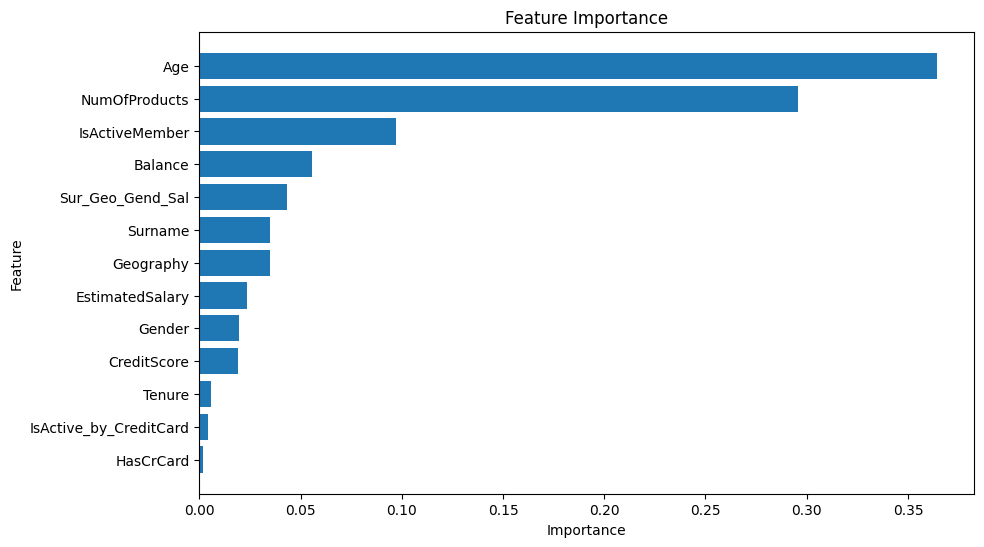

In [12]:
import matplotlib.pyplot as plt

# 특성 중요도 확인
feature_importance = gbc_tune.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# 중요도가 높은 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# 결론

- Accuracy : 0.8659
- ROC_AUC : 0.8908
- Kaggle private 점수 : 0.89191

- 주요 특성 Top 5
    - Age (나이)
    - NumOfProducts (고객의 이용 상품 수)
    - IsActiveMember (고객 활동 여부)
    - Balance (계좌잔고)
    - Sur_Geo_Gend_Sal (성씨-지역-성별-추정급여)